### Wholesale Customers Analysis

### Problem Statement: A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).





1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import os

import math
import scipy.stats as stats
import statistics
from scipy.stats import ttest_1samp,ttest_ind
from statsmodels.stats.power import ttest_power
import statsmodels.stats.weightstats as statsmod

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
os.listdir()

['project_smdm_pooja.ipynb',
 'A B shingles.csv',
 'smdm_report_pooja.pdf',
 '.ipynb_checkpoints',
 'Survey.csv',
 'Wholesale Customer.csv']

In [4]:
df1 = pd.read_csv('Wholesale Customer.csv')

In [5]:
df1

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125


In [6]:
df1.shape

(440, 9)

### 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [7]:
df1.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [8]:
# The above small dataframe gives us the descriptive statistics of all the numerical columns 
# in the wholesale customer dataframe

# From the above table, we can get the count, mean, standard deviation, minimum value, maximum
# value, percentile values of the given data

# When we compare the several items given, we can see the below information:
# mean value is highest for the item Fresh
# Highest Maximum spending is for the item Fresh

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [10]:
# From the above data, we can say that there are 440 rows(0 to 439) and 9 columns
# All the columns has 440 as the no. of rows and hence we can say that there may not be any
# missing values in the data imported
# The data contains data types int and object

In [11]:
df1 = df1.drop("Buyer/Spender", axis=1)

In [12]:
df1.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,Hotel,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185


In [13]:
df1['Total']=df1.sum(axis=1)

In [14]:
df1.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,Retail,Other,22615,5410,7198,3915,1777,5185,46100


In [15]:
new_df1_channel = df1.groupby('Channel')['Total']

In [16]:
new_df1_channel.sum()

Channel
Hotel     7999569
Retail    6619931
Name: Total, dtype: int64

In [17]:
new_df1_channel.sum().sort_values()

Channel
Retail    6619931
Hotel     7999569
Name: Total, dtype: int64

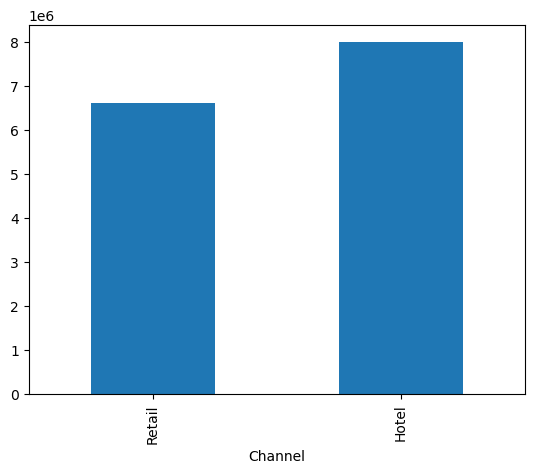

In [18]:
new_df1_channel.sum().sort_values().plot(kind='bar');

In [19]:
# Hotel channel spent the most and Retail channel spent the least

In [20]:
new_df1_region = df1.groupby('Region')['Total']

In [21]:
new_df1_region.sum().sort_values()

Region
Oporto     1555088
Lisbon     2386813
Other     10677599
Name: Total, dtype: int64

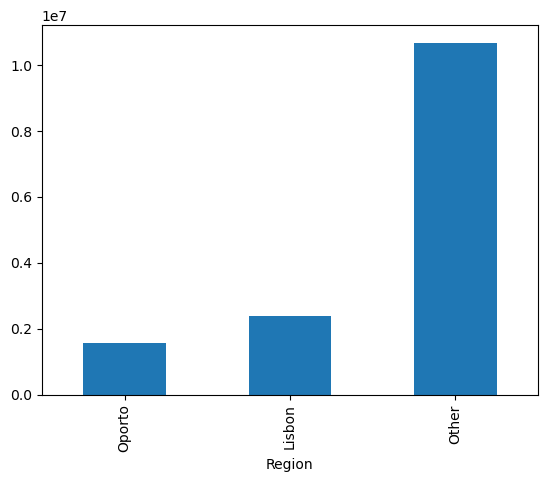

In [22]:
new_df1_region.sum().sort_values().plot(kind='bar');

In [23]:
# Oporto region spent the least and Other region spent the most

### 1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.


In [24]:
df1.head(3)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,Retail,Other,6353,8808,7684,2405,3516,7844,36610


In [25]:
df1.groupby(['Channel','Region'])['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen'].describe().T

Channel                        Hotel                               \
Region                        Lisbon        Oporto          Other   
Fresh            count     59.000000     28.000000     211.000000   
                 mean   12902.254237  11650.535714   13878.052133   
                 std    12342.008901   8969.362752   14746.572913   
                 min      514.000000      3.000000       3.000000   
                 25%     4437.500000   4938.250000    3702.500000   
                 50%     8656.000000   9787.000000    9612.000000   
                 75%    18135.000000  17031.500000   18821.000000   
                 max    56083.000000  32717.000000  112151.000000   
Milk             count     59.000000     28.000000     211.000000   
                 mean    3870.203390   2304.250000    3486.981043   
                 std     4298.321195   2968.628697    4508.505269   
                 min      258.000000    333.000000      55.000000   
                 25%     1071.000000   1146.000000    1188.500000   
                 50%     2280.000000   1560.500000    2247.000000   
                 75%     4995.500000   2344.750000    4205.000000   
                 max    23527.000000  16784.000000   43950.000000   
Grocery          count     59.000000     28.000000     211.000000   
                 mean    4026.135593   4395.500000    3886.734597   
                 std     3629.644143   3048.298815    3593.506056   
                 min      489.000000   1330.000000       3.000000   
                 25%     1620.000000   2373.750000    1666.000000   
                 50%     2576.000000   3352.000000    2642.000000   
                 75%     5172.500000   5527.500000    4927.500000   
                 max    16966.000000  13626.000000   21042.000000   
Frozen           count     59.000000     28.000000     211.000000   
                 mean    3127.322034   5745.035714    3656.900474   
                 std     3276.460124  11454.478518    4956.590848   
                 min       91.000000    264.000000      25.000000   
                 25%      966.000000    962.250000     779.000000   
                 50%     1859.000000   2696.500000    1960.000000   
                 75%     4479.000000   4617.000000    4542.500000   
                 max    18711.000000  60869.000000   36534.000000   
Detergents_Paper count     59.000000     28.000000     211.000000   
                 mean     950.525424    482.714286     786.682464   
                 std     1305.907616    425.310506    1099.970640   
                 min        5.000000     15.000000       3.000000   
                 25%      237.000000    182.750000     176.500000   
                 50%      412.000000    325.000000     375.000000   
                 75%      874.000000    707.000000     948.500000   
                 max     5828.000000   1679.000000    6907.000000   
Delicatessen     count     59.000000     28.000000     211.000000   
                 mean    1197.152542   1105.892857    1518.284360   
                 std     1219.945304   1056.778800    3663.183304   
                 min        7.000000     51.000000       3.000000   
                 25%      374.000000    567.250000     378.500000   
                 50%      749.000000    883.000000     823.000000   
                 75%     1621.500000   1146.000000    1582.000000   
                 max     6854.000000   5609.000000   47943.000000   

Channel                       Retail                              
Region                        Lisbon        Oporto         Other  
Fresh            count     18.000000     19.000000    105.000000  
                 mean    5200.000000   7289.789474   9831.504762  
                 std     5415.521495   6867.934548   9635.394129  
                 min       18.000000    161.000000     23.000000  
                 25%     2378.250000   2368.000000   2343.000000  
                 50%     2926.000000   6468.000000   7362.000000  
             

In [26]:
# The above table shows us the description of all the varieties across region and channel

In [27]:
pd.pivot_table(df1,values=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen'],index=['Channel','Region'])

Delicatessen  Detergents_Paper         Fresh       Frozen  \
Channel Region                                                              
Hotel   Lisbon   1197.152542        950.525424  12902.254237  3127.322034   
        Oporto   1105.892857        482.714286  11650.535714  5745.035714   
        Other    1518.284360        786.682464  13878.052133  3656.900474   
Retail  Lisbon   1871.944444       8225.277778   5200.000000  2584.111111   
        Oporto   1239.000000       8410.263158   7289.789474  1540.578947   
        Other    1826.209524       6899.238095   9831.504762  1513.200000   

                     Grocery          Milk  
Channel Region                              
Hotel   Lisbon   4026.135593   3870.203390  
        Oporto   4395.500000   2304.250000  
        Other    3886.734597   3486.981043  
Retail  Lisbon  18471.944444  10784.000000  
        Oporto  16326.315789   9190.789474  
        Other   15953.809524  10981.009524

In [28]:
# Looking at the above table, we see that some categories like Milk, Grocery & 
# Detergents_Paper have higher spend in the Retail channel versus Hotel, across all regions. 

# On the other hand, Fresh and Frozen have higher consumption in the Hotel channel versus 
# Retail, across all regions.

In [29]:
df1.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,Retail,Other,22615,5410,7198,3915,1777,5185,46100


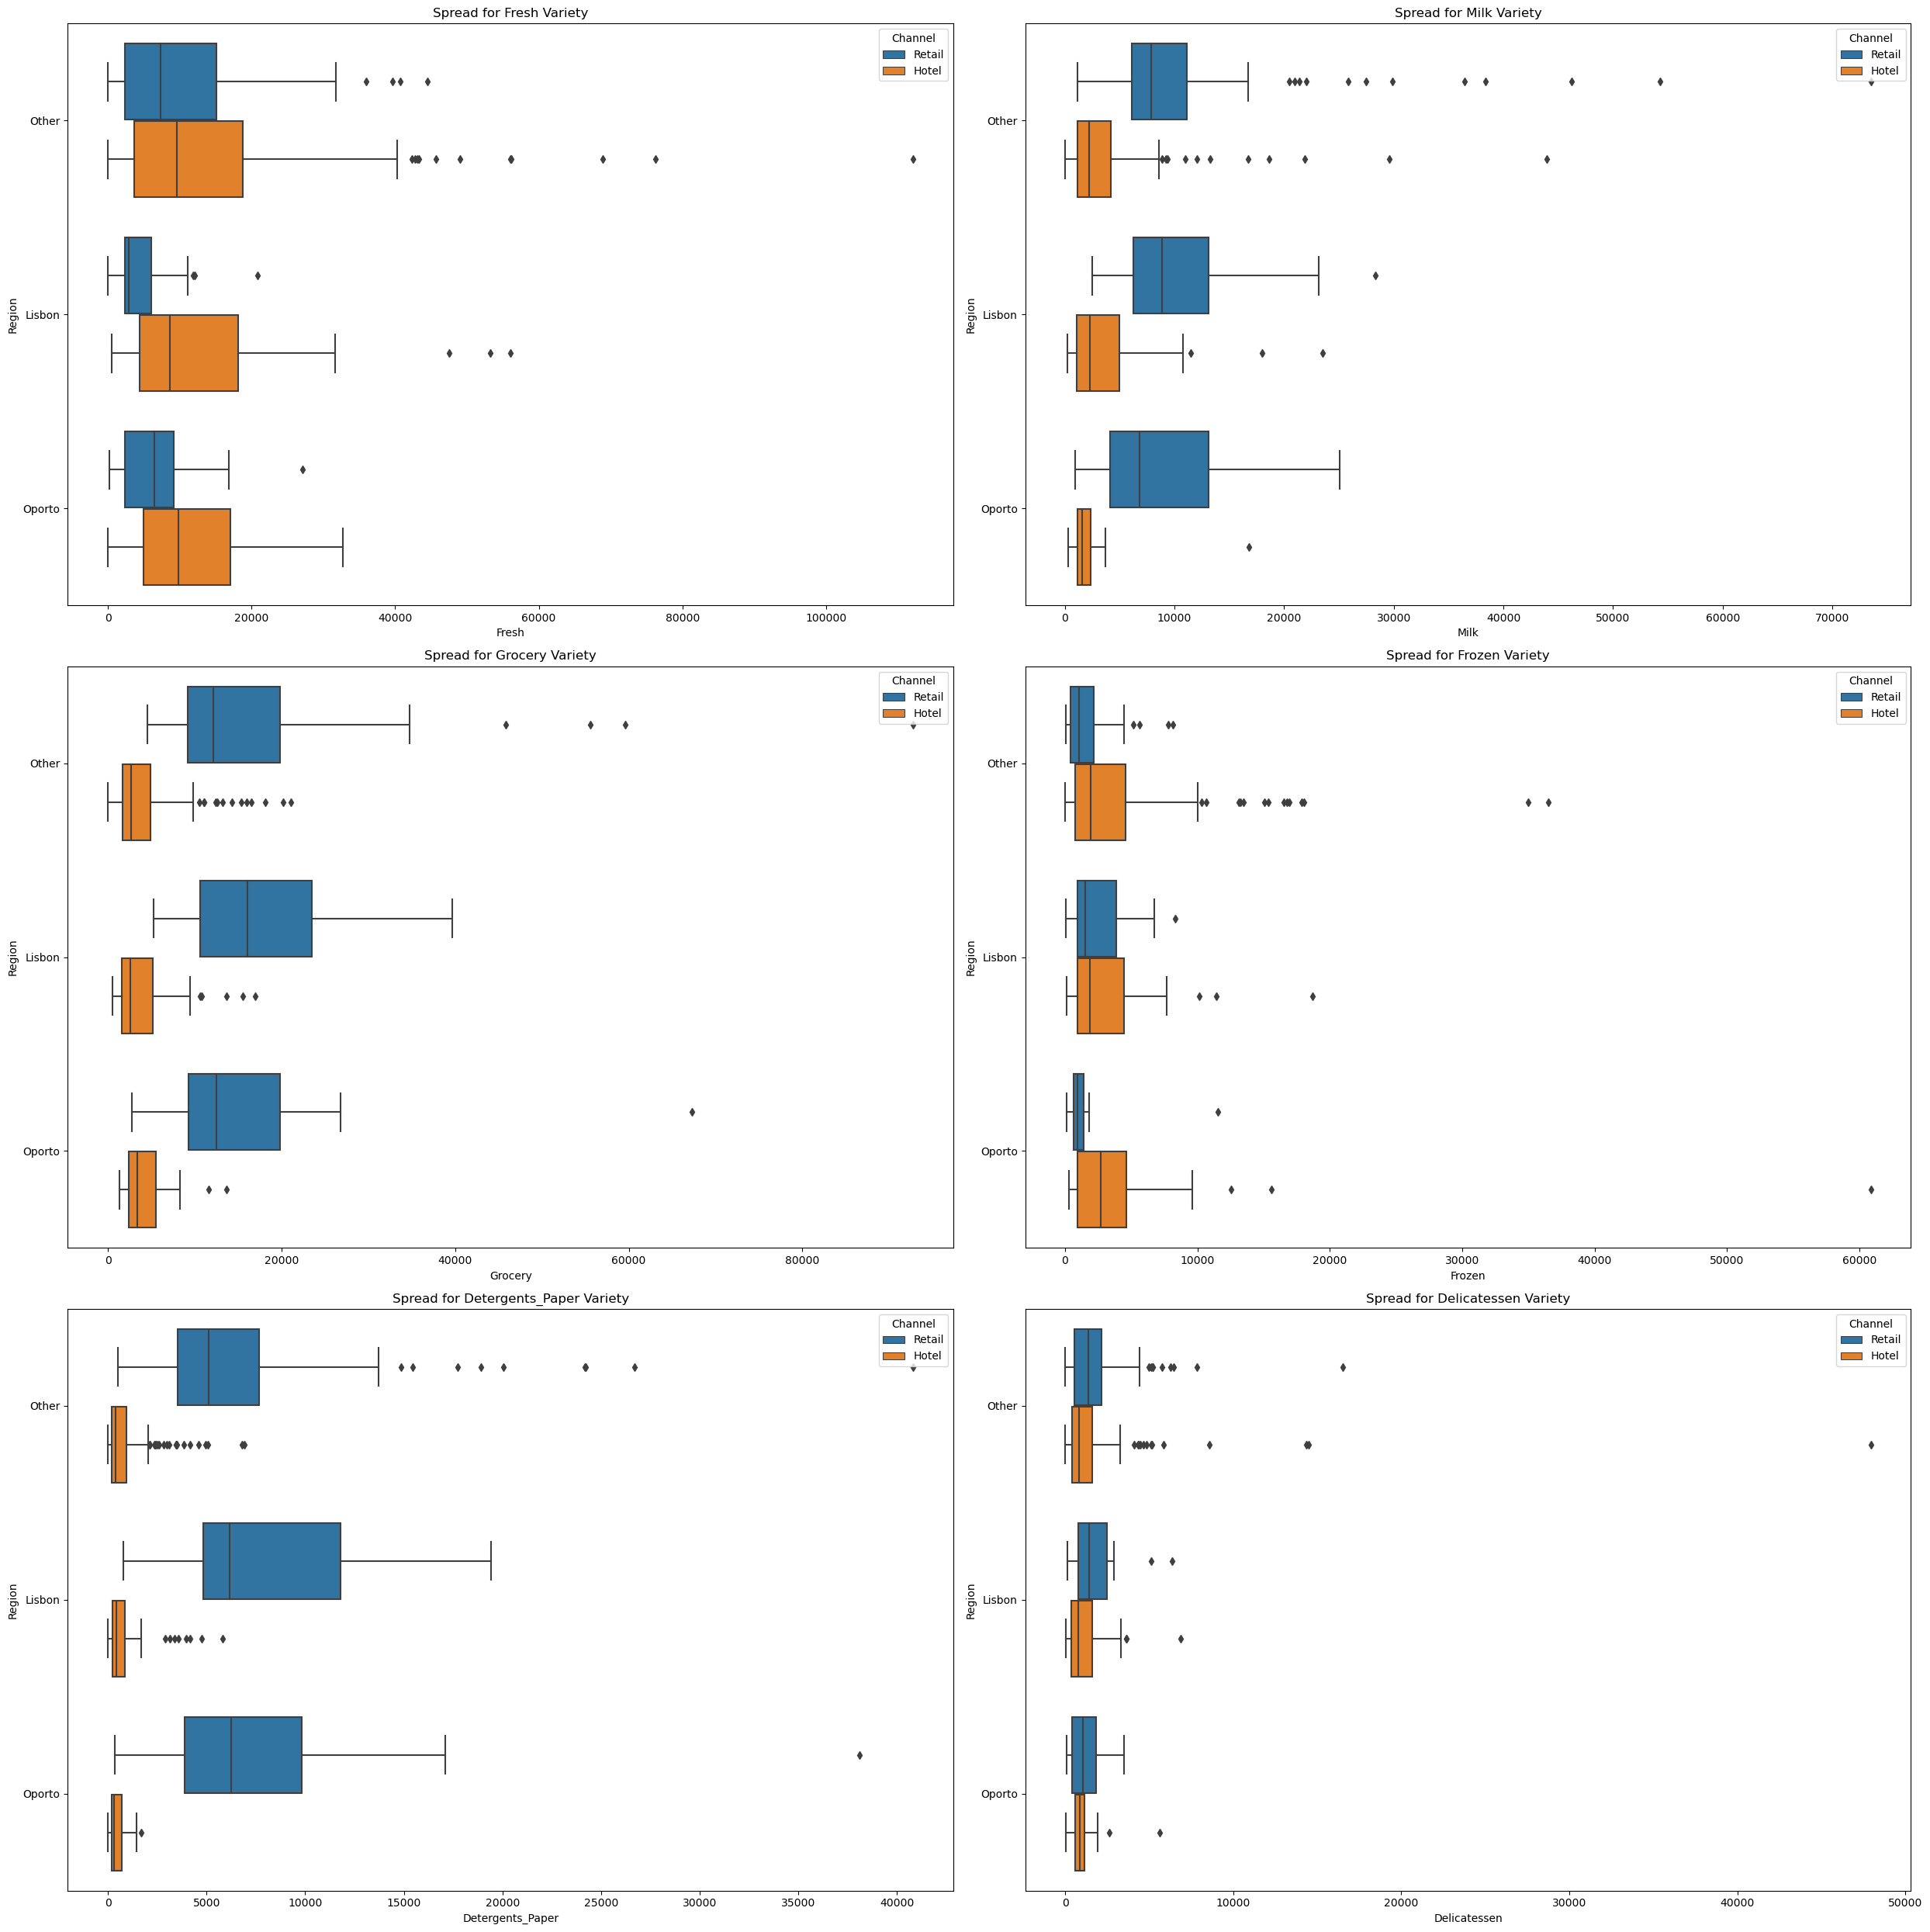

In [30]:
plt.figure(figsize=(25,25))
plt.subplot(3,2,1)
sns.boxplot(x='Fresh',y='Region',data=df1,hue='Channel');
plt.title('Spread for Fresh Variety')

plt.subplot(3,2,2)
sns.boxplot(x='Milk',y='Region',data=df1,hue='Channel');
plt.title('Spread for Milk Variety')

plt.subplot(3,2,3)
sns.boxplot(x='Grocery',y='Region',data=df1,hue='Channel');
plt.title('Spread for Grocery Variety')

plt.subplot(3,2,4)
sns.boxplot(x='Frozen',y='Region',data=df1,hue='Channel');
plt.title('Spread for Frozen Variety')

plt.subplot(3,2,5)
sns.boxplot(x='Detergents_Paper',y='Region',data=df1,hue='Channel');
plt.title('Spread for Detergents_Paper Variety')

plt.subplot(3,2,6)
sns.boxplot(x='Delicatessen',y='Region',data=df1,hue='Channel')
plt.title('Spread for Delicatessen Variety');

plt.tight_layout()
plt.show()

In [31]:
# Also from the above box plot we can summarize that the spend for Fresh and groceries is the maximum across region and channel.
# while for Delicatessen it is the least across region and channel.

### 1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?


In [32]:
df1.head(3)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,Retail,Other,6353,8808,7684,2405,3516,7844,36610


In [33]:
df1.std()

Fresh               12647.328865
Milk                 7380.377175
Grocery              9503.162829
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicatessen         2820.105937
Total               26356.301730
dtype: float64

In [34]:
df1.mean()

Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
Total               33226.136364
dtype: float64

In [35]:
df1.std()/df1.mean()

Fresh               1.053918
Milk                1.273299
Grocery             1.195174
Frozen              1.580332
Detergents_Paper    1.654647
Delicatessen        1.849407
Total               0.793240
dtype: float64

In [36]:
print('Coefficient of Variation for Fresh is :',round((df1['Fresh'].std()/df1['Fresh'].mean()),5))

print('Coefficient of Variation for Milk is :',round((df1['Milk'].std()/df1['Milk'].mean()),5))

print('Coefficient of Variation for Grocery is :',round((df1['Grocery'].std()/df1['Grocery'].mean()),5))

print('Coefficient of Variation for Frozen is :',round((df1['Frozen'].std()/df1['Frozen'].mean()),5))

print('Coefficient of Variation for Detergents_Paper is :',round((df1['Detergents_Paper'].std()/df1['Detergents_Paper'].mean()),5))

print('Coefficient of Variation for Delicatessen is :',round((df1['Delicatessen'].std()/df1['Delicatessen'].mean()),5))

Coefficient of Variation for Fresh is : 1.05392
Coefficient of Variation for Milk is : 1.2733
Coefficient of Variation for Grocery is : 1.19517
Coefficient of Variation for Frozen is : 1.58033
Coefficient of Variation for Detergents_Paper is : 1.65465
Coefficient of Variation for Delicatessen is : 1.84941


In [37]:
# The higher the coefficient of variation, greater the level of dispersion around the mean.
# The lower the value of the coefficient of variation, the more precise the estimate.

In [38]:
# By calculating Coefficient of Variation, we know that least value is for Category “Fresh”(1.05)
# and highest value is for Category “Delicatessen”(1.84)

# From the above data, it is clear that most inconsistent behavior is shown by item 
# 'Delicatessen' and least inconsistent behavior is shown by item 'Fresh'

### 1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.


In [39]:
df1=pd.read_csv('Wholesale Customer.csv')

In [40]:
df1.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [41]:
df1 = df1.drop("Buyer/Spender", axis=1)

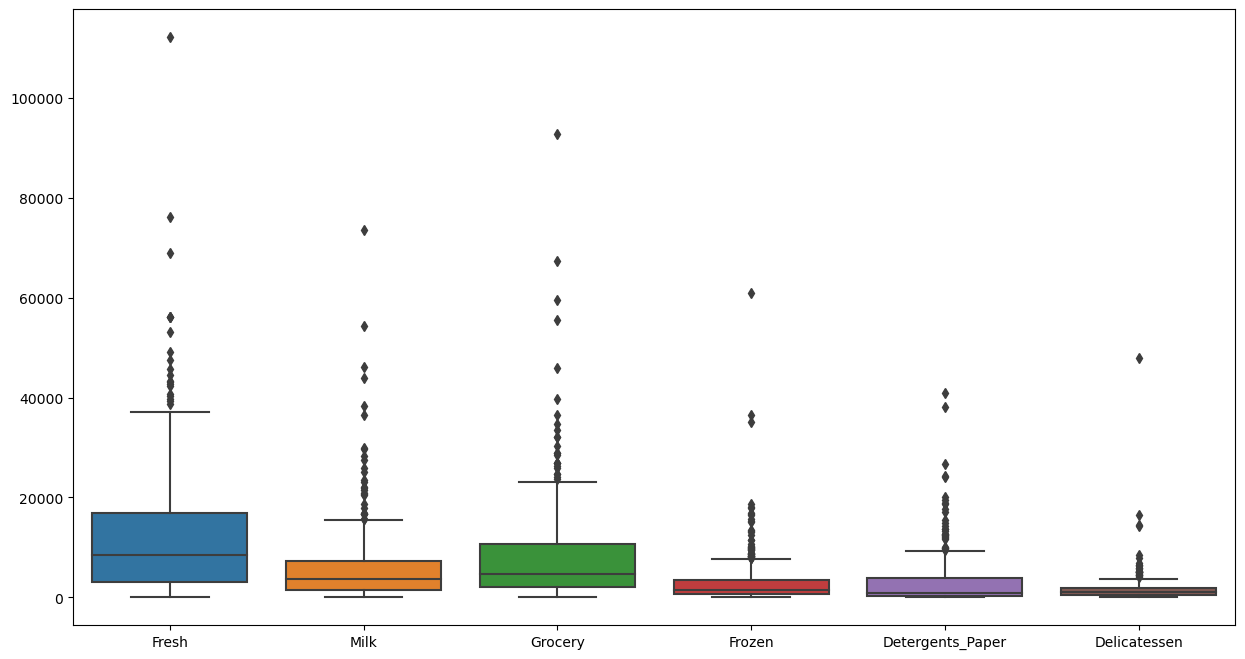

In [42]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df1);

In [43]:
# As per the above box plot, we can clearly see that there are outliers in the data.
# Outliers are present for all the items in the given dataset.

### 1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective

In [44]:
# As per the above analysis, there are inconsistencies in the amount spent for different 
# items (concluded this by calculating Coefficient of Variation). Inconsistency can be reduced

# There is a huge difference in spending for Hotel and Retail channels for few items such as
# Fresh, Milk, Grocery, Detergents_paper. The difference in spending can be reduced.

# For the items 'Fresh' and 'Grocery', there is a large spread for the amount spent.
# Hence, business can also focus on other items in order to increase their spends.

# 'Other' region has more spending compared to 'Oporto' and 'Lisbon'. The business can focus
# on increasing the spends for reatailers in the regions 'Oporto' and 'Lisbon'.

### Survey DataSet

### Problem Statement: The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).


2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

2.1.1. Gender and Major

2.1.2. Gender and Grad Intention

2.1.3. Gender and Employment

2.1.4. Gender and Computer

2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.2.1. What is the probability that a randomly selected CMSU student will be male?

2.2.2. What is the probability that a randomly selected CMSU student will be female?

2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.3.1. Find the conditional probability of different majors among the male students in CMSU.

2.3.2 Find the conditional probability of different majors among the female students of CMSU.

2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop. 

2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?

2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.

Answer the following questions based on the data

2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

In [45]:
df2 = pd.read_csv('Survey.csv')

In [46]:
df2.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [47]:
df2.shape

(62, 14)

### 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)


#### 2.1.1. Gender and Major

In [48]:
pd.crosstab(df2['Gender'],df2['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


#### 2.1.2. Gender and Grad Intention

In [49]:
pd.crosstab(df2['Gender'],df2['Grad Intention'])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


#### 2.1.3. Gender and Employment

In [50]:
pd.crosstab(df2['Gender'],df2['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


#### 2.1.4. Gender and Computer

In [51]:
pd.crosstab(df2['Gender'],df2['Computer'])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


### 2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

In [52]:
df2.head(3)

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200


### 2.2.1. What is the probability that a randomly selected CMSU student will be male?

In [53]:
female_students = df2.Gender.value_counts()[0]
male_students = df2.Gender.value_counts()[1]
Total_students = df2.Gender.value_counts()[0]+df2.Gender.value_counts()[1]

In [54]:
print('no. of female students:',female_students)
print('no. of male students:',male_students)

print('Total no. of students:',Total_students)

no. of female students: 33
no. of male students: 29
Total no. of students: 62


In [55]:
print('The probability that a randomly selected CMSU student will be male is = 29/62 = '
      ,round((male_students/Total_students),4))

The probability that a randomly selected CMSU student will be male is = 29/62 =  0.4677


### 2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [56]:
print('The probability that a randomly selected CMSU student will be female is = 33/62 = '
      ,round((female_students/Total_students),4))

The probability that a randomly selected CMSU student will be female is = 33/62 =  0.5323


### 2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

### 2.3.1. Find the conditional probability of different majors among the male students in CMSU.

In [57]:
pd.crosstab(df2['Gender'],df2['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [58]:
print('no. of male students:',male_students)

no. of male students: 29


In [59]:
Prob_Male_Accounting=4/29
Prob_Male_CIS=1/29
Prob_Male_EconomicsFinance=4/29
Prob_Male_InternationalBusiness = 2/29
Prob_Male_Management = 6/29
Prob_Male_Other = 4/29
Prob_Male_Retailing = 5/29
Prob_Male_Undecided = 3/29

In [60]:
print('The probability of students choosing Accounting among the male students in CMSU = 4/29 = ',round(Prob_Male_Accounting,4),'\n')
print('The probability of students choosing CIS among the male students in CMSU = 1/29 = ',round(Prob_Male_CIS,4),'\n')
print('The probability of students choosing Economics/Finance among the male students in CMSU = 4/29 = ',round(Prob_Male_EconomicsFinance,4),'\n')
print('The probability of students choosing International Business among the male students in CMSU = 2/29 = ',round(Prob_Male_InternationalBusiness,4),'\n')
print('The probability of students choosing Management among the male students in CMSU = 6/29 = ',round(Prob_Male_Management,4),'\n')
print('The probability of students choosing Other among the male students in CMSU = 4/29 = ',round(Prob_Male_Other,4),'\n')
print('The probability of students choosing Retailing/Marketing among the male students in CMSU = 5/29 = ',round(Prob_Male_Retailing,4),'\n')
print('The probability of students choosing Undecided among the male students in CMSU = 3/29 = ',round(Prob_Male_Undecided,4),'\n')

The probability of students choosing Accounting among the male students in CMSU = 4/29 =  0.1379 

The probability of students choosing CIS among the male students in CMSU = 1/29 =  0.0345 

The probability of students choosing Economics/Finance among the male students in CMSU = 4/29 =  0.1379 

The probability of students choosing International Business among the male students in CMSU = 2/29 =  0.069 

The probability of students choosing Management among the male students in CMSU = 6/29 =  0.2069 

The probability of students choosing Other among the male students in CMSU = 4/29 =  0.1379 

The probability of students choosing Retailing/Marketing among the male students in CMSU = 5/29 =  0.1724 

The probability of students choosing Undecided among the male students in CMSU = 3/29 =  0.1034 



### 2.3.2 Find the conditional probability of different majors among the female students of CMSU.


In [61]:
print('no. of female students:',female_students)

no. of female students: 33


In [62]:
Prob_Female_Accounting=3/33
Prob_Female_CIS=3/33
Prob_Female_EconomicsFinance=7/33
Prob_Female_InternationalBusiness = 4/33
Prob_Female_Management = 4/33
Prob_Female_Other = 3/33
Prob_Female_Retailing = 9/33
Prob_Female_Undecided = 0/33

In [63]:
print('The probability of students choosing Accounting among the female students in CMSU = 3/33 = ',round(Prob_Female_Accounting,4),'\n')
print('The probability of students choosing CIS among the female students in CMSU = 3/33 = ',round(Prob_Female_CIS,4),'\n')
print('The probability of students choosing Economics/Finance among the female students in CMSU = 7/33 = ',round(Prob_Female_EconomicsFinance,4),'\n')
print('The probability of students choosing International Business among the female students in CMSU = 4/33 = ',round(Prob_Female_InternationalBusiness,4),'\n')
print('The probability of students choosing Management among the female students in CMSU = 4/33 = ',round(Prob_Female_Management,4),'\n')
print('The probability of students choosing Other among the female students in CMSU = 3/33 = ',round(Prob_Female_Other,4),'\n')
print('The probability of students choosing Retailing/Marketing among the female students in CMSU = 9/33 = ',round(Prob_Female_Retailing,4),'\n')
print('The probability of students choosing Undecided among the female students in CMSU = 0/33 = ',round(Prob_Female_Undecided,4),'\n')

The probability of students choosing Accounting among the female students in CMSU = 3/33 =  0.0909 

The probability of students choosing CIS among the female students in CMSU = 3/33 =  0.0909 

The probability of students choosing Economics/Finance among the female students in CMSU = 7/33 =  0.2121 

The probability of students choosing International Business among the female students in CMSU = 4/33 =  0.1212 

The probability of students choosing Management among the female students in CMSU = 4/33 =  0.1212 

The probability of students choosing Other among the female students in CMSU = 3/33 =  0.0909 

The probability of students choosing Retailing/Marketing among the female students in CMSU = 9/33 =  0.2727 

The probability of students choosing Undecided among the female students in CMSU = 0/33 =  0.0 



### 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:


### 2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

In [64]:
pd.crosstab(df2['Gender'],df2['Grad Intention'])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [65]:
print('Total number of students :',Total_students)

Total number of students : 62


In [66]:
Prob_maleandgraduate = 17/62
print('Probability that a randomly chosen student is male and intends to graduate = 17/62 ='
      ,round(Prob_maleandgraduate,4))

Probability that a randomly chosen student is male and intends to graduate = 17/62 = 0.2742


### 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop.

In [67]:
pd.crosstab(df2['Gender'],df2['Computer'])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [68]:
Prob_female_nolaptop = (2/62)+(2/62)

print('Probability that a randomly selected student is female and does not have laptop = 4/62 =',round(Prob_female_nolaptop,4))

Probability that a randomly selected student is female and does not have laptop = 4/62 = 0.0645


### 2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

### 2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?


In [69]:
pd.crosstab(df2['Gender'],df2['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [70]:
Prob_maleorfulltime = ((7+19+3)/62)+((3+7)/62)-(7/62)
print('Probability that a randomly chosen student is a male or has full-time employment = ((7+19+3)/62)+((3+7)/62)-(7/62) =',round(Prob_maleorfulltime,4))

Probability that a randomly chosen student is a male or has full-time employment = ((7+19+3)/62)+((3+7)/62)-(7/62) = 0.5161


### 2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [71]:
pd.crosstab(df2['Gender'],df2['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [72]:
print('number of female students :',female_students)

number of female students : 33


In [73]:
Prob_female_iborm = (4/33)+(4/33)

In [74]:
print('Probability that given a female student is randomly chosen, she is majoring in international business or management = 8/33 =',round(Prob_female_iborm,4))

Probability that given a female student is randomly chosen, she is majoring in international business or management = 8/33 = 0.2424


### 2.6. Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?


In [75]:
df2.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [76]:
new_df2 = pd.crosstab(df2['Gender'],df2['Grad Intention'])
new_df2

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [77]:
contingency_gender_grad = pd.pivot_table(new_df2,values=['No','Yes'],index='Gender')
contingency_gender_grad

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


In [78]:
# For graduate intention and being female to be independent events, it should satisfy the
# condition, Prob(Female and Yes) = P(Female) * P(Yes)

In [79]:
P_femaleandyes = 11/40
print('probability of being female and grad intention to be yes = 11/40 =',P_femaleandyes)

probability of being female and grad intention to be yes = 11/40 = 0.275


In [80]:
P_yes = 28/40
print('probability of grad intention to be yes = 28/40 =',P_yes)

probability of grad intention to be yes = 28/40 = 0.7


In [81]:
P_Female = 20/40
print('probability of being a female = 20/40 =',P_Female)

probability of being a female = 20/40 = 0.5


In [82]:
print('P_yes * P_female :',P_yes * P_Female)

P_yes * P_female : 0.35


In [83]:
P_femaleandyes == P_yes * P_Female

False

In [84]:
# P_femaleandyes is not equal to (P_yes * P_Female).
# Hence, graduate intention and being female are not independent events

### 2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. Answer the following questions based on the data



In [85]:
df2.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


### 2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [86]:
print('number of students with GPA less than 3 is =',df2[df2['GPA']<3]['ID'].count())

number of students with GPA less than 3 is = 17


In [87]:
print('Total number of students =',df2['GPA'].count())

Total number of students = 62


In [88]:
Prob_GPAlessthan3 = df2[df2['GPA']<3]['ID'].count()/df2['GPA'].count()

print('Probability that his/her GPA is less than 3 when a student chosen randomly = 17/62 =',round(Prob_GPAlessthan3,4))

Probability that his/her GPA is less than 3 when a student chosen randomly = 17/62 = 0.2742


### 2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

In [89]:
print('number of students whose salary is 50 or more:')
print(df2[df2['Salary']>=50]['Gender'].value_counts())

number of students whose salary is 50 or more:
Female    18
Male      14
Name: Gender, dtype: int64


In [90]:
print('total number of students:')
print(df2['Gender'].value_counts())

total number of students:
Female    33
Male      29
Name: Gender, dtype: int64


In [91]:
print('probability that a randomly selected male earns 50 or more = 14/29 ',round((14/29),4))

probability that a randomly selected male earns 50 or more = 14/29  0.4828


In [92]:
print('probability that a randomly selected female earns 50 or more = 18/33 =',round((18/33),4))

probability that a randomly selected female earns 50 or more = 18/33 = 0.5455


### 2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

In [93]:
df2.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


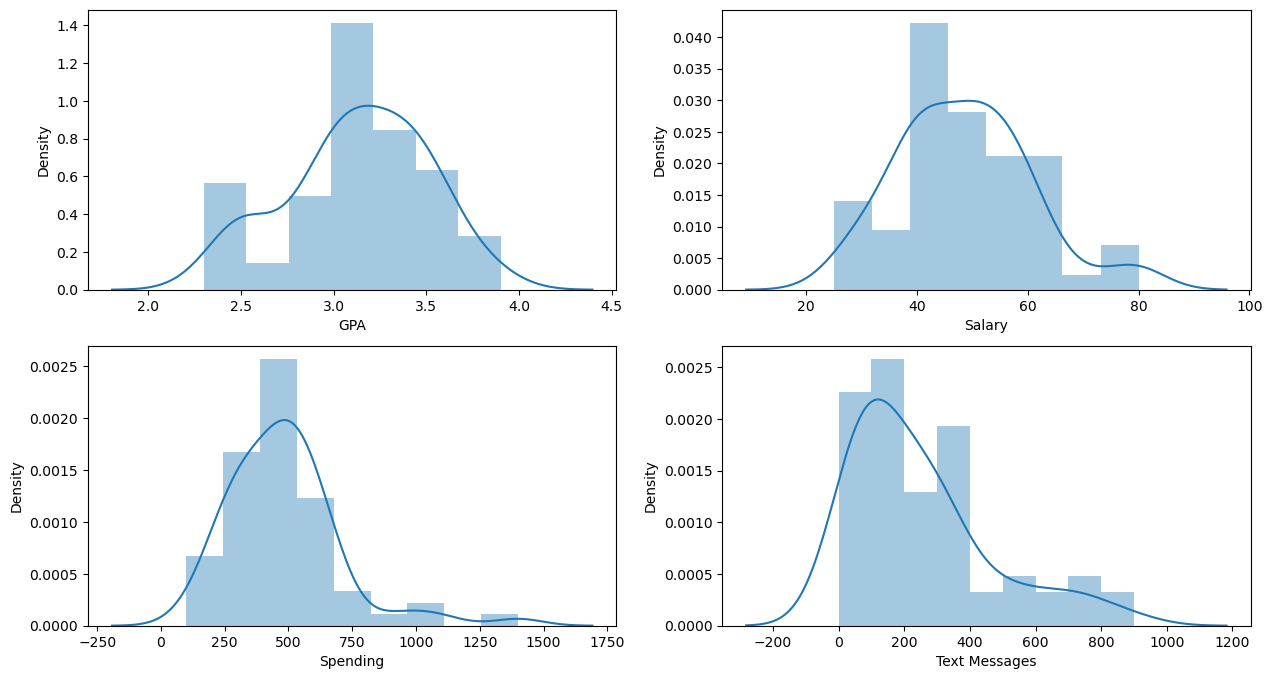

In [94]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.distplot(df2['GPA']);

plt.subplot(2,2,2)
sns.distplot(df2['Salary']);

plt.subplot(2,2,3)
sns.distplot(df2['Spending']);

plt.subplot(2,2,4)
sns.distplot(df2['Text Messages']);

In [95]:
#GPA

In [96]:
# calculating the mean for GPA

mu_gpa = df2['GPA'].mean()
print('mean of gpa :',mu_gpa)

mean of gpa : 3.129032258064516


In [97]:
# calculating the standard deviation for GPA

sigma_gpa = df2['GPA'].std()
print('standard deviation of gpa :',sigma_gpa)

standard deviation of gpa : 0.3773883926969118


In [98]:
mu_gpa+sigma_gpa

3.5064206507614277

In [99]:
mu_gpa-sigma_gpa

2.7516438653676043

In [100]:
gpa_one_sd = stats.norm.cdf(mu_gpa+sigma_gpa,mu_gpa,sigma_gpa) - stats.norm.cdf(mu_gpa-sigma_gpa,mu_gpa,sigma_gpa)
gpa_two_sd = stats.norm.cdf(mu_gpa+(2*sigma_gpa),mu_gpa,sigma_gpa) - stats.norm.cdf(mu_gpa-(2 * sigma_gpa),mu_gpa,sigma_gpa)
gpa_three_sd = stats.norm.cdf(mu_gpa+(3 * sigma_gpa),mu_gpa,sigma_gpa) - stats.norm.cdf(mu_gpa-(3 * sigma_gpa),mu_gpa,sigma_gpa)


In [101]:
print('Fraction of values within one standard deviation for GPA :',round(gpa_one_sd,3))

print('Fraction of values within two standard deviation for GPA :',round(gpa_two_sd,3))

print('Fraction of values within three standard deviation for GPA :',round(gpa_three_sd,3))

Fraction of values within one standard deviation for GPA : 0.683
Fraction of values within two standard deviation for GPA : 0.954
Fraction of values within three standard deviation for GPA : 0.997


In [102]:
stats.norm.cdf(mu_gpa+sigma_gpa) - stats.norm.cdf(mu_gpa-sigma_gpa)

0.0027377599716255085

In [103]:
# Salary

In [104]:
# calculating the mean for Salary

mu_salary = df2['Salary'].mean()
print('mean of salary :',mu_salary)

mean of salary : 48.54838709677419


In [105]:
# calculating the standard deviation for Salary

sigma_salary = df2['Salary'].std()
print('standard deviation of salary :',sigma_salary)

standard deviation of salary : 12.080912216337277


In [106]:
mu_salary + sigma_salary

60.62929931311147

In [107]:
mu_salary - sigma_salary

36.46747488043692

In [108]:
salary_one_sd = stats.norm.cdf(mu_salary+sigma_salary,mu_salary,sigma_salary) - stats.norm.cdf(mu_salary-sigma_salary,mu_salary,sigma_salary)
salary_two_sd = stats.norm.cdf(mu_salary+(2*sigma_salary),mu_salary,sigma_salary) - stats.norm.cdf(mu_salary-(2 * sigma_salary),mu_salary,sigma_salary)
salary_three_sd = stats.norm.cdf(mu_salary+(3 * sigma_salary),mu_salary,sigma_salary) - stats.norm.cdf(mu_salary-(3 * sigma_salary),mu_salary,sigma_salary)


In [109]:
print('Fraction of values within one standard deviation for Salary :',round(salary_one_sd,3))

print('Fraction of values within two standard deviation for Salary :',round(salary_two_sd,3))

print('Fraction of values within three standard deviation for Salary :',round(salary_three_sd,3))

Fraction of values within one standard deviation for Salary : 0.683
Fraction of values within two standard deviation for Salary : 0.954
Fraction of values within three standard deviation for Salary : 0.997


In [110]:
# Spending

In [111]:
# calculating the mean for Spending

mu_spending = df2['Spending'].mean()
print('mean of spending :',mu_spending)

mean of spending : 482.01612903225805


In [112]:
# calculating the standard deviation for Spending

sigma_spending = df2['Spending'].std()
print('standard deviation of spending :',sigma_spending)

standard deviation of spending : 221.95380496596204


In [113]:
mu_spending + sigma_spending

703.9699339982201

In [114]:
mu_spending - sigma_spending

260.062324066296

In [115]:
spending_one_sd = stats.norm.cdf(mu_spending+sigma_spending,mu_spending,sigma_spending) - stats.norm.cdf(mu_spending-sigma_spending,mu_spending,sigma_spending)
spending_two_sd = stats.norm.cdf(mu_spending+(2*sigma_spending),mu_spending,sigma_spending) - stats.norm.cdf(mu_spending-(2 * sigma_spending),mu_spending,sigma_spending)
spending_three_sd = stats.norm.cdf(mu_spending+(3 * sigma_spending),mu_spending,sigma_spending) - stats.norm.cdf(mu_spending-(3 * sigma_spending),mu_spending,sigma_spending)


In [116]:
print('Fraction of values within one standard deviation for Spending :',round(spending_one_sd,3))

print('Fraction of values within two standard deviation for Spending :',round(spending_two_sd,3))

print('Fraction of values within three standard deviation for Spending :',round(spending_three_sd,3))

Fraction of values within one standard deviation for Spending : 0.683
Fraction of values within two standard deviation for Spending : 0.954
Fraction of values within three standard deviation for Spending : 0.997


In [117]:
# Text Messages

In [118]:
# calculating the mean for Text Messages

mu_textmessages = df2['Text Messages'].mean()
print('mean of text messages :',mu_textmessages)

mean of text messages : 246.20967741935485


In [119]:
# calculating the standard deviation for Text Messages

sigma_textmessages = df2['Text Messages'].std()
print('standard deviation of text messages :',sigma_textmessages)

standard deviation of text messages : 214.4659503026961


In [120]:
tm_one_sd = stats.norm.cdf(mu_textmessages+sigma_textmessages,mu_textmessages,sigma_textmessages) - stats.norm.cdf(mu_textmessages-sigma_textmessages,mu_textmessages,sigma_textmessages)
tm_two_sd = stats.norm.cdf(mu_textmessages+(2 * sigma_textmessages),mu_textmessages,sigma_textmessages) - stats.norm.cdf(mu_textmessages-(2 * sigma_textmessages),mu_textmessages,sigma_textmessages)
tm_three_sd = stats.norm.cdf(mu_textmessages+(3 * sigma_textmessages),mu_textmessages,sigma_textmessages) - stats.norm.cdf(mu_textmessages-(3 * sigma_textmessages),mu_textmessages,sigma_textmessages)


In [121]:
print('Fraction of values within one standard deviation for text messages :',round(tm_one_sd,3))

print('Fraction of values within two standard deviation for text messages :',round(tm_two_sd,3))

print('Fraction of values within three standard deviation for text messages :',round(tm_three_sd,3))

Fraction of values within one standard deviation for text messages : 0.683
Fraction of values within two standard deviation for text messages : 0.954
Fraction of values within three standard deviation for text messages : 0.997


In [122]:
# For all the numerical variables, below is observed:
# 68% of the observed values lie between 1 standard deviation around the mean
# 95% of the observed values lie between 2 standard deviations around the mean
# 99.7% of the observed values lie between 3 standard deviation around the mean

# Hence, we can say that GPA, Salary, Spending and Text Messages follow normal distribution

### Problem 3 : An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and coloring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet are calculated. The company would like to show that the mean moisture content is less than 0.35 pounds per 100 square feet.


### The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.

In [123]:
os.listdir()

['project_smdm_pooja.ipynb',
 'A B shingles.csv',
 'smdm_report_pooja.pdf',
 '.ipynb_checkpoints',
 'Survey.csv',
 'Wholesale Customer.csv']

In [124]:
df3 = pd.read_csv('A B shingles.csv')

In [125]:
df3

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37
5,0.24,0.18
6,0.16,0.42
7,0.20,0.58
8,0.20,0.25
9,0.20,0.41


### 3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

In [126]:
# H0: mu <= 0.35
# H1: mu > 0.35

In [127]:
tstat,pval = ttest_1samp(df3['A'],0.35)

In [128]:
tstat,pval

(-1.4735046253382782, 0.14955266289815025)

In [129]:
print('t statistic value is: ',tstat)

t statistic value is:  -1.4735046253382782


In [130]:
print('p value divided by 2 is: ',pval/2)

p value divided by 2 is:  0.07477633144907513


In [131]:
pval/2 > 0.05

True

In [132]:
# pval is greater than alpha(assuming 5% significance level)
# Failed to reject null hypothesis(H0)
# Hence, there is no evidence that the mean moisture contents in type A shingles is greater than 0.35

In [133]:
B = df3['B'].dropna()

In [134]:
B

0     0.14
1     0.15
2     0.31
3     0.16
4     0.37
5     0.18
6     0.42
7     0.58
8     0.25
9     0.41
10    0.17
11    0.13
12    0.23
13    0.11
14    0.10
15    0.19
16    0.22
17    0.44
18    0.11
19    0.11
20    0.31
21    0.43
22    0.26
23    0.18
24    0.44
25    0.43
26    0.16
27    0.52
28    0.36
29    0.22
30    0.39
Name: B, dtype: float64

In [135]:
tstat,pval = ttest_1samp(B,0.35)

In [136]:
tstat,pval

(-3.1003313069986995, 0.004180954800638363)

In [137]:
print('t statistic value is: ',tstat)

t statistic value is:  -3.1003313069986995


In [138]:
print('p value divided by 2 is: ',pval/2)

p value divided by 2 is:  0.0020904774003191813


In [139]:
pval < 0.05

True

In [140]:
# Since pval is less than alpha(0.05), Reject null hypothesis(H0).
# Hence, there is enough evidence to conclude that mean moisture content for Sample B shingles is greater than 0.35

### 3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

In [141]:
# H0: mu_A = mu_B
# H1: mu_A != mu_B

In [142]:
alpha = 0.05

In [143]:
t_stat,p_value = ttest_ind(df3['A'],B)

In [144]:
t_stat,p_value

(1.289628271966112, 0.2017496571835328)

In [145]:
print('t statistic value is: ',t_stat)

t statistic value is:  1.289628271966112


In [146]:
print('p value is: ',p_value)

p value is:  0.2017496571835328


In [147]:
p_value>alpha

True

In [148]:
# p value is greater than alpha(0.05)
# Hence, failed to reject H0.
# There is enough evidence that the population mean for shingles A and B are equal.